<a href="https://colab.research.google.com/github/MBSant/Python/blob/main/Projeto_Satisfa%C3%A7%C3%A3o_do_Consumidor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto de análise da satisfação do consumidor 🙂😟
###Desenvolvido no grupo **Mulheres em Dados** pela Profª. **Andressa Apio**


⛳ O objetivo deste projeto é fazer uma análise das variáveis que influenciam na satisfação do consumidor ante os dados de um E-commerce.

🌐 Os dados foram retirados do site da Kaggle:  https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

Colunas da tabela:
1. **order_status**: status do pedido (entregue ou cancelado) (delivered or canceled).

2. **order_purchase_timestamp**: timestamp (data/hora) da compra de cada item.

3. **order_delivered_customer_date**: data real de entrega do pedido do cliente.

4. **order_estimated_delievy_date**: data de entrega estimada que foi fornecida ao cliente no momento da compra.

5. **shipping_limit_date**: data limite de envio do vendedor para a transferência do pedido ao parceiro logístico.

6. **payment_sequential**: método de pagamento utilizado pelo consumidor.

7. **payment_type**: método de pagamento preferido do cliente.

8. **payment_installments**: número de parcelas de pagamento preferido do cliente.

9. **payment_value**: valor da transação.

10. **price**: custo de cada item.

11. **freight_value**: custo de transporte para cada item (se um pedido tiver mais de um item, o valor do frete é dividido entre os itens).

12. **product_category**: categoria de cada item.

13. **product_name_length**: número de caracteres extraídos do nome do produto.

14. **product_description_length**: número de caracteres extraídos da descrição do produto.

15. **product_photos_qty**: número de fotos de produtos que foram publicadas.

16. **review_score**: classificação dada por um cliente em uma pesquisa de satisfação que varia de 1 a 5.



In [ ]:
# Importando algumas bibliotecas:
# Pandas
import pandas as pd #Importando e já atribuindo um apelido.

# Matplotlib.pyplot
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# ✨ Carregando os dados
### Importação de tabela por tabela.

In [ ]:
# definição do caminho dos arquivos para ler os dados
diretorio = 'https://raw.githubusercontent.com/andressaapio/pythontutorials/main/data/olist/' 

In [ ]:
#Comando para carregar o dataset com informações sobre os PEDIDOS, especificando o formato como csv: pd.read_csv().
orders = pd.read_csv(diretorio + 'olist_orders_dataset.csv')

#Comando para mostrar as 5 primeiras linhas da tabela Pedidos: .head().
orders.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
#Comando para carregar o dataset com informações sobre as AVALIAÇÕES, especificando o formato como csv: pd.read_csv().
order_reviews = pd.read_csv(diretorio + 'olist_order_reviews_dataset.csv')

# Comando para mostrar os 5 primeiros dados(linhas) da tabela de Avaliação dos Pedidos.
order_reviews.head() 

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
#Comando para carregar o dataset com informações sobre PAGAMENTO especificando o formato como csv: pd.read_csv().
order_payments = pd.read_csv(diretorio + 'olist_order_payments_dataset.csv')

#Comando para mostrar os 5 primeiros dados(linhas) da tabela de Pagamentos: .head().
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
#Comando para carregar o dataset com informações sobre os CONSUMIDORES especificando o formato como csv: pd.read_csv().
customer = pd.read_csv(diretorio + 'olist_customers_dataset.csv')

#Comando para mostrar os 10 primeiros dados(linhas) da tabela Consumidores: .head(10).
customer.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [ ]:
#Comando para carregar o dataset com informações sobre os PEDIDOS especificando o formato como csv: pd.read_csv().
order_items = pd.read_csv(diretorio + 'olist_order_items_dataset.csv')

# Comando para mostrar os 3 primeiros dados(linhas) da tabela Pedidos, .head(3).
order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [ ]:
#Comando para carregar o dataset com informações sobre os PRODUTOS especificando o formato como csv: pd.read_csv().
products = pd.read_csv(diretorio + 'olist_products_dataset.csv')

#Comando para mostrar os 6 primeiros dados(linhas) da tabela Produtos, .head(6).
products.head(6)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0


In [ ]:
#Comando para carregar o dataset com informações sobre os VENDEDORES especificando o formato como csv: pd.read_csv().
sellers = pd.read_csv(diretorio + 'olist_sellers_dataset.csv')

#Comando para mostrar os 8 primeiros dados(linhas) da tabela Vendedores: .head(8).
sellers.head(8)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP


In [ ]:
#Comando para carregar o dataset com a TRADUÇÃO DAS CATEGORIAS especificando o formato como csv: pd.read_csv().
product_translation = pd.read_csv(diretorio + 'product_category_name_translation.csv')

#Comando para mostrar os 9 primeiros dados(linhas) da tabela Tradução de Categorias: .head(9).
product_translation.head(9)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony


# ✨ Merge dos Datasets

### Aplicação da função MERGE, que tem como objetivo unir bases de dados que apresentam uma variável em comum.
### Função que faz parte da Biblioteca PANDAS, por isso utilizaremos pd.merge().

#### Merge para juntar dados dos consumidores.

In [ ]:
#Criando uma tabela chamada A unindo a tabela ORDERS com a tabela ORDERS_REVIEWS 
#a partir da variável ORDER_ID que é comum em ambas tabelas
A = pd.merge(orders, order_reviews, on='order_id')

#Unindo a tabela A, criada anteriormente, com a tabela ORDERS_PAYMENTS também 
#a partir da variável ORDER_ID que é comum em ambas. A tabela A agora se 
# modifica sendo agregada nela a nova tabela.
A = pd.merge(A, order_payments,on='order_id')

# Agregando a tabela CUSTOMER à tabela A através da variável CUSTOMER_ID. 
A = pd.merge(A, customer,on='customer_id')

#Para visualizar como ficou as colunas dessa nova tabela:
A.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,...,2018-08-08 00:00:00,2018-08-08 18:37:50,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,...,2018-08-18 00:00:00,2018-08-22 19:07:58,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


#### Merge com os dataset que se referem aos Vendedores:

In [ ]:
# Criando uma tabela chamada B onde será unida a tabela ORDER_ITEMS com a 
# tabela PRODUCTS através da variável PRODUCT_ID.
B = pd.merge(order_items,products,on='product_id')

#Agora será adicionado a tabela B a tabela SELLERS a partir da variável SELLER_ID
B = pd.merge(B,sellers,on='seller_id')

#Adicionando a tabela PRODUCT_TRANSLATION à tabela B pela variável PRODUCT_CATEGORY
#_NAME:
B = pd.merge(B,product_translation, on = 'product_category_name')

#Chamando as primeiras 5 linhas na tabela B:
B.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff


#### Merge com o dataset CONSUMIDORES e dataset VENDEDORES

In [ ]:
#Criando um dataframe (df) com a junção dos dois dataframes (A e B) a partir da 
# variável ORDER_ID

df_ecommerce = pd.merge(A, B, on= 'order_id')

#Apresentando as 5 primeiras linhas:
df_ecommerce.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,...,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,...,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP,auto


# ✨ Selecionando os dados do Dataframe
Com a criação de uma única tabela a partir de várias acabou por trazer junto muitos dados que não serão necessários para a análise. Dessa forma agora será feita a seleção dos dados que serão utilizados.

In [ ]:
# Para visualizar as colunas do Dataframe:
df_ecommerce.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'product_category_name_english'],
      dtype='object')

In [ ]:
#Selecionando apenas as seguintes colunas: 
#'order_status',
#'order_purchase_timestamp',
#'order_delivered_customer_date',
#'order_estimated_delivery_date',
#'shipping_limit_date',
#'payment_sequential',
#'payment_type',
#'payment_installments',
#'payment_value',
#'price','freight_value',
#'product_category_name_english',
#'product_name_lenght',
#'product_description_lenght',
#'product_photos_qty',
#'review_score'

#Comando para ficarmos apenas com as colunas selecionadas:

df_ecommerce = df_ecommerce[['order_status','order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date',
                              'shipping_limit_date','payment_sequential','payment_type','payment_installments','payment_value',
                              'price','freight_value','product_category_name_english','product_name_lenght','product_description_lenght',
                              'product_photos_qty','review_score']]
                            

In [ ]:
#Corrigindo o nome das colunas:
df_ecommerce = df_ecommerce.rename(columns={'product_name_lenght': 'product_name_length', 'product_description_lenght': 'product_description_length',
                                            'product_category_name_english': 'product_category'})

#Apresentando as 5 primeiras linhas do dataframe modificado:
df_ecommerce.head()

,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_category,product_name_length,product_description_length,product_photos_qty,review_score
0,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,1,credit_card,1,18.12,29.99,8.72,housewares,40.0,268.0,4.0,4
1,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,3,voucher,1,2.00,29.99,8.72,housewares,40.0,268.0,4.0,4
2,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,2,voucher,1,18.59,29.99,8.72,housewares,40.0,268.0,4.0,4
3,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-30 03:24:27,1,boleto,1,141.46,118.70,22.76,perfumery,29.0,178.0,1.0,4
4,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-13 08:55:23,1,credit_card,3,179.12,159.90,19.22,auto,46.0,232.0,1.0,5


In [ ]:
#Vendo a formação (formato) de linhas e colunas do novo dataframe:
df_ecommerce.shape

(115609, 16)

# ✨ Limpeza dos dados e pré-processamento

Verificar se há dados faltantes, se as informações fazem sentido e estão de forma correta.

### Removendo os valores nulos (NaN):

In [ ]:
#Verificando a quantidade (.sum) de valores nulos (.isnull) temos no dataframe.
df_ecommerce.isnull().sum()
#O resultado apresenta a soma de valores nulos em cada coluna do dataframe.

order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2400
order_estimated_delivery_date       0
shipping_limit_date                 0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
price                               0
freight_value                       0
product_category                    0
product_name_length                 0
product_description_length          0
product_photos_qty                  0
review_score                        0
dtype: int64

In [ ]:
#Comando para remover os dados com valores nulos.
#O comando fala para retirar os dados onde a resposta seja TRUE da "pergunta" 
#se há valores nulos.
#O comando "any" é para que se qualquer valor for nulo, remova toda a linha. 
#Há a opção "all" também, onde será removida a linha onde todos os valores da linha forem nulos
df_ecommerce.dropna(how='any',inplace=True)

#Vendo como ficou o formato do dataframe após a remoção das linhas:
df_ecommerce.shape

(113209, 16)

### Convertendo o formato de data:

In [ ]:
#Vendo como está se apresentando o formato de data no dataframe:
df_ecommerce['order_purchase_timestamp']

0         2017-10-02 10:56:33
1         2017-10-02 10:56:33
2         2017-10-02 10:56:33
3         2018-07-24 20:41:37
4         2018-08-08 08:38:49
                 ...         
115604    2018-02-06 12:58:58
115605    2017-08-27 14:46:43
115606    2018-01-08 21:28:27
115607    2018-01-08 21:28:27
115608    2018-03-08 20:57:30
Name: order_purchase_timestamp, Length: 113209, dtype: object

In [ ]:
df_ecommerce['order_estimated_delivery_date']

0         2017-10-18 00:00:00
1         2017-10-18 00:00:00
2         2017-10-18 00:00:00
3         2018-08-13 00:00:00
4         2018-09-04 00:00:00
                 ...         
115604    2018-03-02 00:00:00
115605    2017-09-27 00:00:00
115606    2018-02-15 00:00:00
115607    2018-02-15 00:00:00
115608    2018-04-03 00:00:00
Name: order_estimated_delivery_date, Length: 113209, dtype: object

In [ ]:
df_ecommerce['order_delivered_customer_date']

0         2017-10-10 21:25:13
1         2017-10-10 21:25:13
2         2017-10-10 21:25:13
3         2018-08-07 15:27:45
4         2018-08-17 18:06:29
                 ...         
115604    2018-02-28 17:37:56
115605    2017-09-21 11:24:17
115606    2018-01-25 23:32:54
115607    2018-01-25 23:32:54
115608    2018-03-16 13:08:30
Name: order_delivered_customer_date, Length: 113209, dtype: object

In [ ]:
df_ecommerce['shipping_limit_date']

0         2017-10-06 11:07:15
1         2017-10-06 11:07:15
2         2017-10-06 11:07:15
3         2018-07-30 03:24:27
4         2018-08-13 08:55:23
                 ...         
115604    2018-02-12 13:10:37
115605    2017-09-05 15:04:16
115606    2018-01-12 21:36:21
115607    2018-01-12 21:36:21
115608    2018-03-15 10:55:42
Name: shipping_limit_date, Length: 113209, dtype: object

In [ ]:
# Analisando as 4 colunas que trazem datas é possivel perceber que apresentam 
#também a hora, como para a análise não será necessária faremos uma alteração 
#na forma em que será apresentada a data, a partir da função .dt.date:

#Criamos uma lista chamada COLS e colocamos como otesn da lista as colunas que
#tratam das datas, depois atribuimos a função .dt.date para cada item da lista 
#criada:

cols = ['order_purchase_timestamp', 'order_estimated_delivery_date', 'order_delivered_customer_date', 'shipping_limit_date']
for col in cols:
    df_ecommerce[col] = pd.to_datetime(df_ecommerce[col]).dt.date

# Para ver o resultado, chamamos as 5 primeiras linhas do dataset:
df_ecommerce.head()

,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_category,product_name_length,product_description_length,product_photos_qty,review_score
0,delivered,2017-10-02,2017-10-10,2017-10-18,2017-10-06,1,credit_card,1,18.12,29.99,8.72,housewares,40.0,268.0,4.0,4
1,delivered,2017-10-02,2017-10-10,2017-10-18,2017-10-06,3,voucher,1,2.00,29.99,8.72,housewares,40.0,268.0,4.0,4
2,delivered,2017-10-02,2017-10-10,2017-10-18,2017-10-06,2,voucher,1,18.59,29.99,8.72,housewares,40.0,268.0,4.0,4
3,delivered,2018-07-24,2018-08-07,2018-08-13,2018-07-30,1,boleto,1,141.46,118.70,22.76,perfumery,29.0,178.0,1.0,4
4,delivered,2018-08-08,2018-08-17,2018-09-04,2018-08-13,1,credit_card,3,179.12,159.90,19.22,auto,46.0,232.0,1.0,5


In [ ]:
#Calcularemos o tempo em dias para a entrega do produto ao cliente, para 
#a entrega do produto à logistica, e para data estimada de entrega ao cliente.

#Calculando os dias até a entrega do produto['delivery_days']. A partir da 
#diferença da data da entrega até a data da compra.
df_ecommerce['delivery_days'] = df_ecommerce['order_delivered_customer_date'] - df_ecommerce['order_purchase_timestamp']

#Calculando a quantidade de dias estimados para a entrega do produto no momento
#da compra ['estimated_days']. Sendo a diferença entre a data estimada de entrega
#e a data da compra.
df_ecommerce['estimated_days'] = df_ecommerce['order_estimated_delivery_date'] - df_ecommerce['order_purchase_timestamp']

#Calculando a quantidade de dias da data de entrega limite à logistica['shipping_days']. 
#A partir da diferença entre a data limite e a data da compra.
df_ecommerce['shipping_days'] = df_ecommerce['shipping_limit_date'] - df_ecommerce['order_purchase_timestamp']

In [ ]:
df_ecommerce['delivery_days']

0         8 days
1         8 days
2         8 days
3        14 days
4         9 days
           ...  
115604   22 days
115605   25 days
115606   17 days
115607   17 days
115608    8 days
Name: delivery_days, Length: 113209, dtype: timedelta64[ns]

In [ ]:
df_ecommerce['estimated_days']

0        16 days
1        16 days
2        16 days
3        20 days
4        27 days
           ...  
115604   24 days
115605   31 days
115606   38 days
115607   38 days
115608   26 days
Name: estimated_days, Length: 113209, dtype: timedelta64[ns]

In [ ]:
df_ecommerce['shipping_days']

0        4 days
1        4 days
2        4 days
3        6 days
4        5 days
          ...  
115604   6 days
115605   9 days
115606   4 days
115607   4 days
115608   7 days
Name: shipping_days, Length: 113209, dtype: timedelta64[ns]

In [ ]:
#O resulatdo apresentado foi uma string, para isso faremos uma alteração para número inteiro

cols = ['delivery_days', 'estimated_days', 'shipping_days']
for col in cols:
    df_ecommerce[col] = df_ecommerce[col].apply(lambda x: x.days)

In [ ]:
df_ecommerce['delivery_days']

0          8
1          8
2          8
3         14
4          9
          ..
115604    22
115605    25
115606    17
115607    17
115608     8
Name: delivery_days, Length: 113209, dtype: int64

# ✨ Removendo as colunas

### Removeremos as colunas com datas que não serão mais necessárias para a análise, já que extraímos os dias.

In [ ]:
df_ecommerce.drop(['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date',
                   'shipping_limit_date'],axis=1,inplace=True)

In [ ]:
df_ecommerce.head()

,order_status,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_category,product_name_length,product_description_length,product_photos_qty,review_score,delivery_days,estimated_days,shipping_days
0,delivered,1,credit_card,1,18.12,29.99,8.72,housewares,40.0,268.0,4.0,4,8,16,4
1,delivered,3,voucher,1,2.00,29.99,8.72,housewares,40.0,268.0,4.0,4,8,16,4
2,delivered,2,voucher,1,18.59,29.99,8.72,housewares,40.0,268.0,4.0,4,8,16,4
3,delivered,1,boleto,1,141.46,118.70,22.76,perfumery,29.0,178.0,1.0,4,14,20,6
4,delivered,1,credit_card,3,179.12,159.90,19.22,auto,46.0,232.0,1.0,5,9,27,5


# ✨ Visualização rápida dos dados

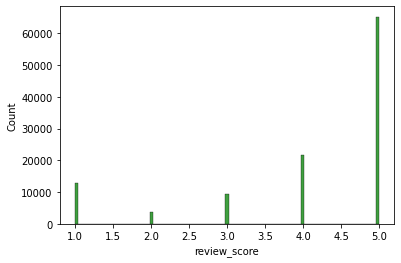

In [ ]:
#Para visualização será utilizada a biblioteca seaborn.Histograma a partir do score das avaliações.

sns.histplot(x='review_score', data=df_ecommerce, color='g')


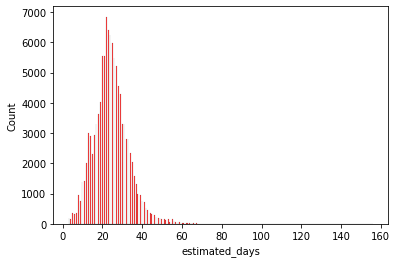

In [ ]:
sns.histplot(x='estimated_days', data=df_ecommerce, color= 'r')

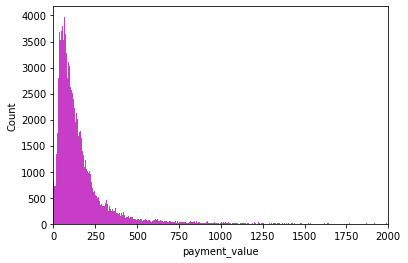

In [ ]:
sns.histplot(x='payment_value', data=df_ecommerce, color = 'm')
plt.xlim([0,2000])
plt.show()

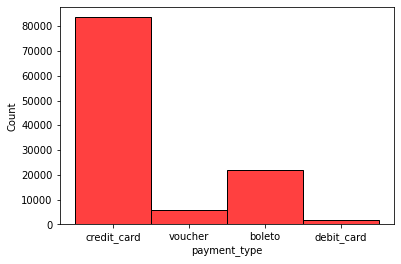

In [ ]:
sns.histplot( x='payment_type', data=df_ecommerce, color = 'r' )
#plt.xlim([0,2000])
plt.show()

# ✨ Análise Exploratória de Dados
Exploratory Data Analysis (EDA)

## 10 Categorias de produtos que mais vendem

In [ ]:
fig_size = (18,8)
font_size = 16
title_font_size = 20

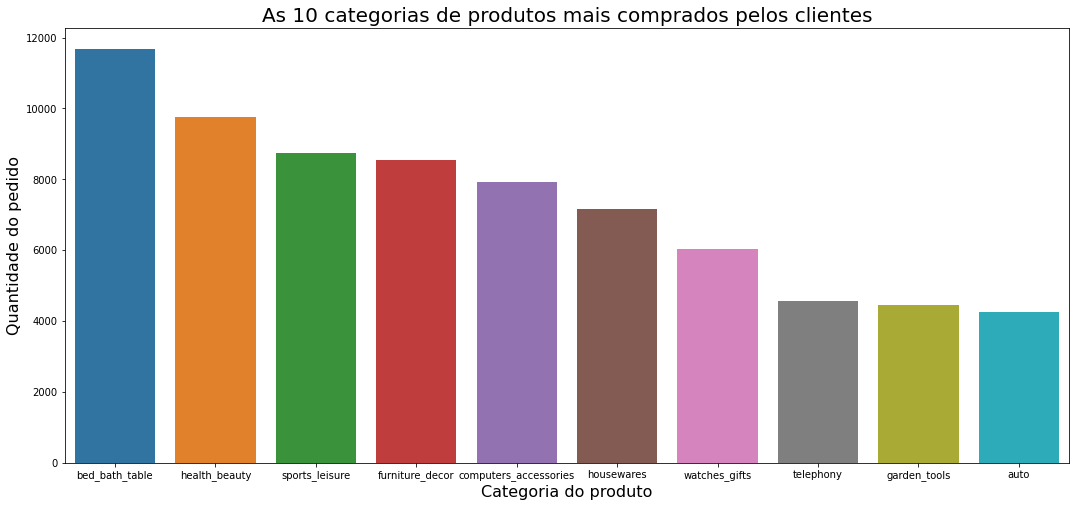

In [ ]:
# definição do gráfico de barras
fig = plt.figure(figsize = fig_size)

sns.barplot(x = df_ecommerce.product_category.value_counts().index[:10], 
            y = df_ecommerce.product_category.value_counts()[:10])

# definição dos nomes dos eixos e título
plt.xlabel('Categoria do produto', fontsize = font_size)
plt.ylabel('Quantidade do pedido', fontsize = font_size)
plt.title("As 10 categorias de produtos mais comprados pelos clientes", fontsize = title_font_size)

plt.show()

**Insights sobre o negócio**


*   As categorias que mais vendem produtos são: Cama, mesa e banho; saúde e beleza; esportes e lazer; móveis e decoração.
*   A categoria Cama, mesa e banho recebeu mais de 10 mil pedidos.



## Valor de pagamento por cliente com base no tipo de pagamento:

In [ ]:
def bar_plot_df(x_var, y_var, title):
  # definição do gráfico de barras
  fig = plt.figure(figsize = fig_size)
  sns.barplot(x = x_var, 
              y = y_var, data=df_ecommerce)
  
  # definição dos nomes dos eixos e título
  plt.xlabel(x_var, fontsize = font_size)
  plt.ylabel(y_var, fontsize = font_size)
  plt.title(title, fontsize = title_font_size)
  
  plt.show()

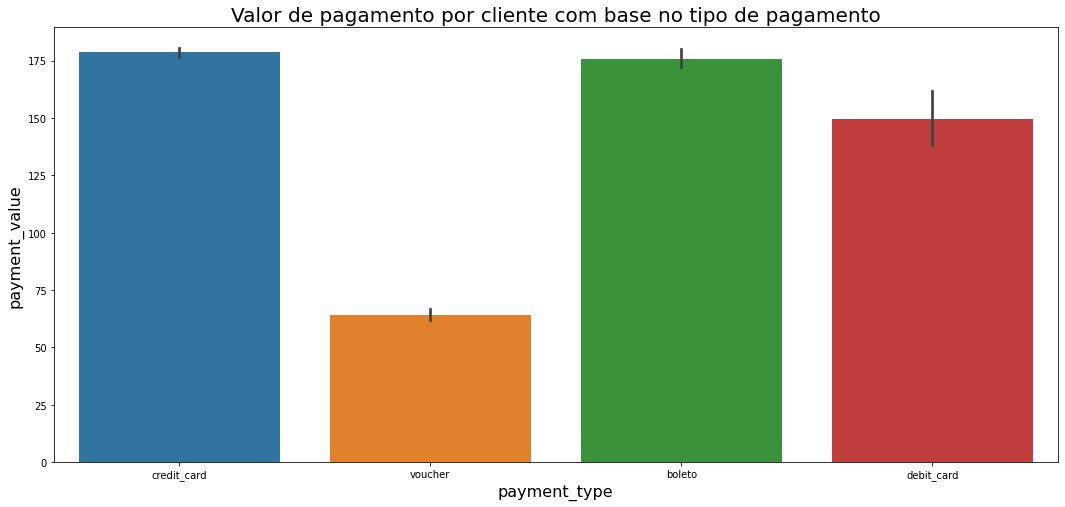

In [ ]:
bar_plot_df('payment_type', 'payment_value', 'Valor de pagamento por cliente com base no tipo de pagamento')

**Insights sobre o negócio**


*   A forma de pagamento que concentra maiores valores é o cartão de crédito, seguido pelo boleto, na terceira posição o cartão de débito e por último o voucher.


## Avaliação do cliente com base no valor da transação

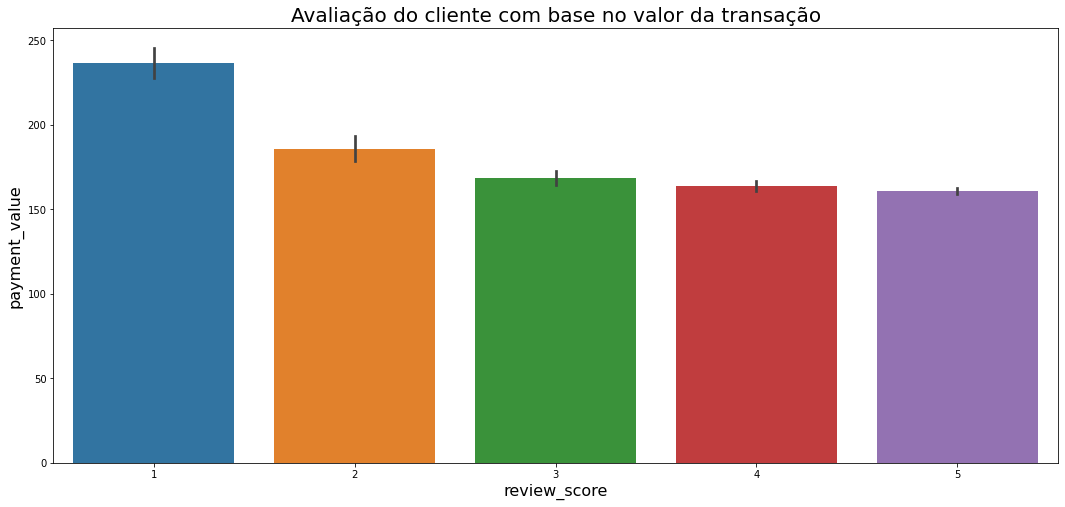

In [ ]:
bar_plot_df('review_score', 'payment_value', 'Avaliação do cliente com base no valor da transação')

**Insights sobre o negócio**

* A avaliação aumenta um pouco à medida que o valor do pagamento diminui.

## Avaliação do cliente com base no valor de cada item

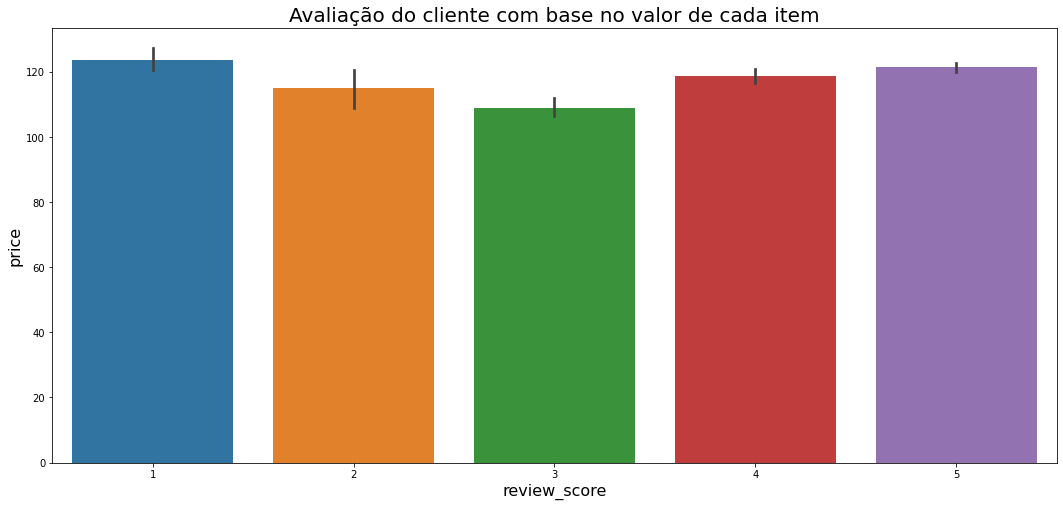

In [ ]:
bar_plot_df('review_score', 'price', 'Avaliação do cliente com base no valor de cada item')

**Insights sobre o negócio**
* O valor do preço parece não ter efeito sobre a avaliação do consumidor.

## Avaliação do cliente com base no valor do frete

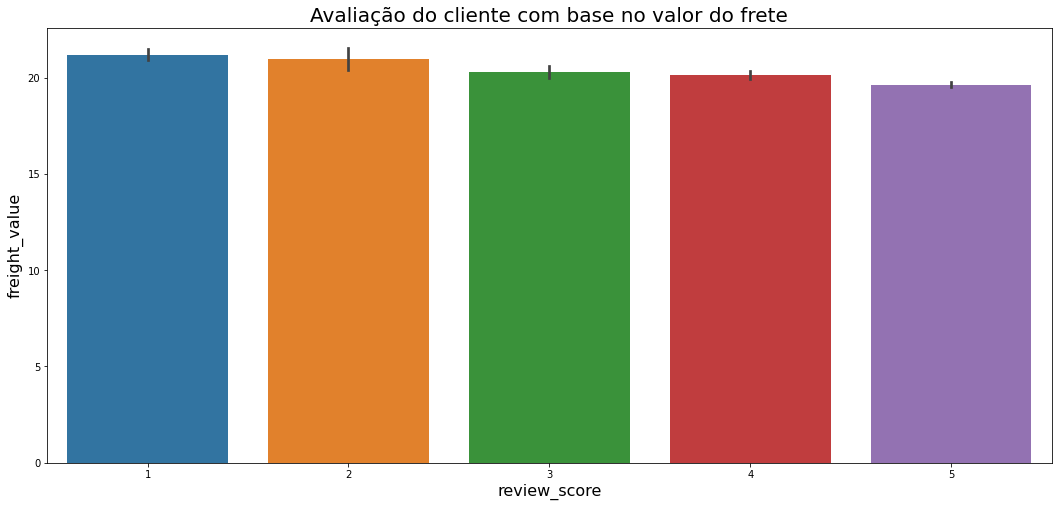

In [ ]:
bar_plot_df('review_score', 'freight_value', 'Avaliação do cliente com base no valor do frete')

**Insights sobre o negócio**

* O cliente provavelmente dará uma melhor avaliação à medida que o valor do frete diminuir.

## Correlação entre o conjunto de dados

Vamos avaliar o quanto uma variável influencia na outra. Lembre que a corraleção positiva (em vermelho, valores próximos a 1) mostra que quando uma variável aumenta seu valor, a outra também aumenta. Enquanto que a correlação negativa mostra que enquanto uma variável aumenta seu valor, a outra diminui (em azul, valores próximos a -1).

Quando uma variável não possui correlação uma com a outra, o valor é 0, que são as cores mais fracas.

Aqui temos apenas uma correlação linear! Não conseguimos pegar outros comportamentos como correlações quadráticas e exponenciais.

Reparem nisso: Na diagonal temos uma correlação de 1, que é a variável contra ela mesma. O triângulo inferior é o espelho do triângulo superior.

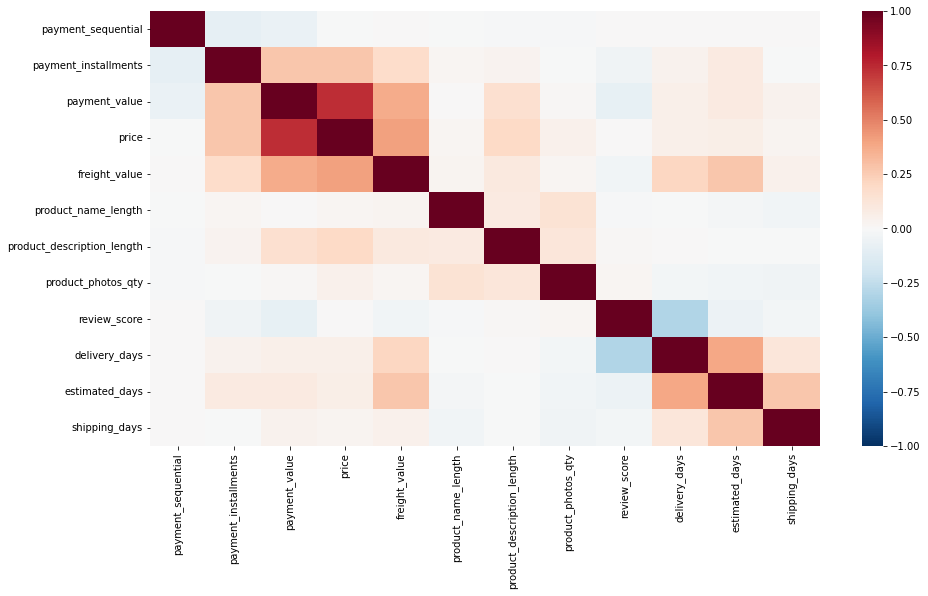

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df_ecommerce.corr(),cmap="RdBu_r",vmin=-1, vmax=1)
plt.show()

Percebemos que:
* os dias para a entrega (delivery_days) possuem correlação postiva com os dias estimados para entrega (estimated_days)
* o valor do frete (freight_value) possui correlação positiva com os dias estimados (estimated_days). Faz sentido: quanto mais dias para entrega, maior o frete (mais distante)
* dias para entrega (delivery_days) possui uma correlação negativa com a avaliação do consumidor (review_score). Faz sentido: quanto mais tempo demora para o cliente receber o pedido, pior vai ser a sua avaliação.

## Correlação entre o valor da transação e o preço do produto

In [ ]:
def scatter_plot_df(x_var, y_var, title):
  # definição do gráfico de dispersão
  fig = plt.figure(figsize = fig_size)

  sns.scatterplot(x=x_var, y=y_var, hue="review_score",
                data = df_ecommerce)

  # definição dos nomes dos eixos e título
  plt.xlabel(x_var, fontsize = font_size)
  plt.ylabel(y_var, fontsize = font_size)

  plt.title(title, fontsize = title_font_size)

  plt.show()

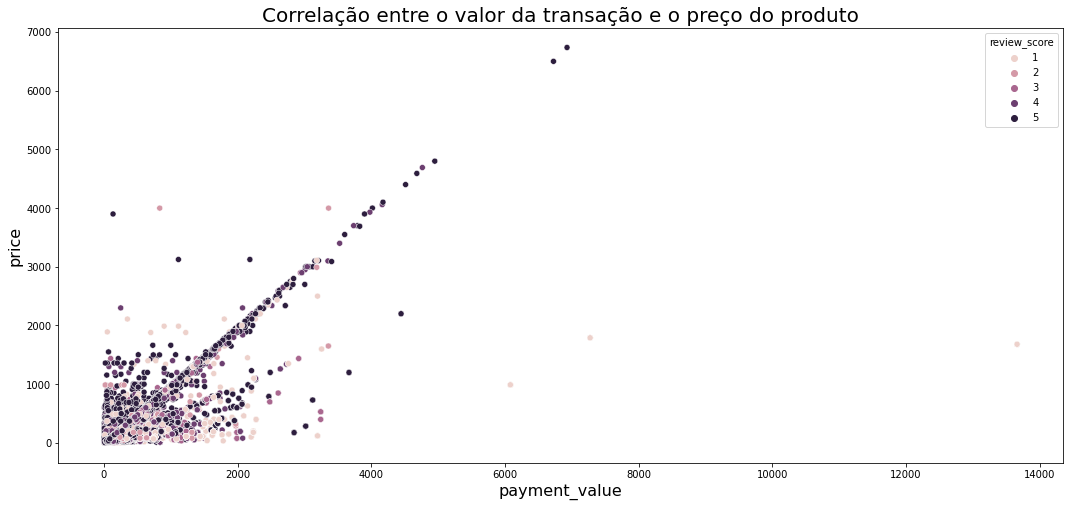

In [ ]:
scatter_plot_df('payment_value', 'price', 'Correlação entre o valor da transação e o preço do produto')

**Insights de negócio**

* A maior parte da pontuação de boa avaliação de 4 e 5 ocorre quando o preço e o valor do pagamento têm o mesmo valor.


* A maior parte da pontuação de avaliação de 5 também aconteceu quando o valor do pagamento é inferior ao preço real dos produtos.

* A maior parte da pontuação de avaliação de 1 aconteceu quando o valor do pagamento é superior ao preço real dos produtos.

## Correlação entre a estimativa para entrega e dias para a entrega

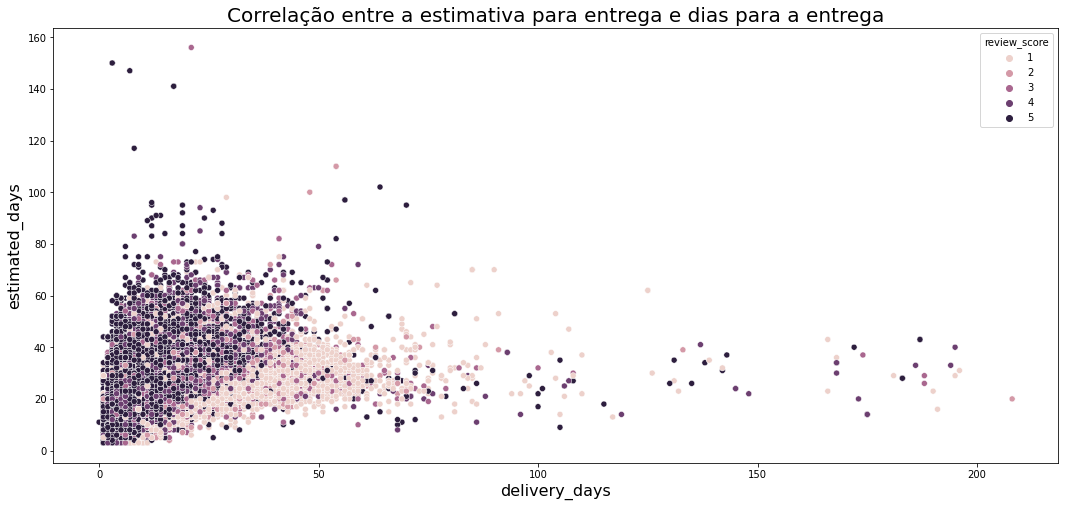

In [ ]:
scatter_plot_df('delivery_days', 'estimated_days', 'Correlação entre a estimativa para entrega e dias para a entrega')

**Insights do negócio** 

* A maioria das avaliações 4 e 5 tem longos dias de estimativa de entrega, mas os dias reais de entrega do produto chegam antes ou no prazo, fazendo com que o produto chegue na mão do cliente mais rápido do que o tempo esperado.

* A maioria das avaliações negativas de 1 e 2 tem estimativa de dias entrega curtos, mas os dias de entrega reais do produto são mais longos do que o tempo esperado.

# ✨ Feature Engineering

Para tornar os dados mais precisos, o feature engineering é usada para criar novas features, como novas colunas e variáveis fictícias que fazem mais sentido para a criação do nosso modelo.

##Cria uma coluna para indicar se chegou atrasado ou não

In [ ]:
#Função para transformar os dados de produto entregue no prazo ou atrasado em 1 e 0.
# 1= no prazo e 0= atrasado
df_ecommerce['arrival_time'] = df_ecommerce['estimated_days'] - df_ecommerce['delivery_days']
df_ecommerce['arrival_time'] = df_ecommerce['arrival_time'].apply(lambda x: 0 if x < 0 else 1)

df_ecommerce

,order_status,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_category,product_name_length,product_description_length,product_photos_qty,review_score,delivery_days,estimated_days,shipping_days,arrival_time
0,delivered,1,credit_card,1,18.12,29.99,8.72,housewares,40.0,268.0,4.0,4,8,16,4,1
1,delivered,3,voucher,1,2.00,29.99,8.72,housewares,40.0,268.0,4.0,4,8,16,4,1
2,delivered,2,voucher,1,18.59,29.99,8.72,housewares,40.0,268.0,4.0,4,8,16,4,1
3,delivered,1,boleto,1,141.46,118.70,22.76,perfumery,29.0,178.0,1.0,4,14,20,6,1
4,delivered,1,credit_card,3,179.12,159.90,19.22,auto,46.0,232.0,1.0,5,9,27,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,delivered,1,credit_card,3,195.00,174.90,20.10,baby,52.0,828.0,4.0,4,22,24,6,1
115605,delivered,1,credit_card,5,271.01,205.99,65.02,home_appliances_2,51.0,500.0,2.0,5,25,31,9,1
115606,delivered,1,credit_card,4,441.16,179.99,40.59,computers_accessories,59.0,1893.0,1.0,2,17,38,4,1
115607,delivered,1,credit_card,4,441.16,179.99,40.59,computers_accessories,59.0,1893.0,1.0,2,17,38,4,1


## Cria uma coluna para transformar avaliações em boas e ruins.

Criaremos uma coluna, considerando as avaliações de 1 a 5, se a avaliação é ruim (0) ou boa (1). A avaliação 3 vai ser descartada por ser neutra.

In [ ]:
# Eliminando as avaliações com nota= 3.
df_ecommerce.drop(df_ecommerce[df_ecommerce['review_score'] == 3].index, inplace=True)

#Transformando as avaliações menores que 3 em ruins e avaliações maiores que 3 em boas.
df_ecommerce['review_score'] = df_ecommerce['review_score'].apply(lambda x: 0 if x < 3 else 1)

In [ ]:
df_ecommerce

,order_status,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_category,product_name_length,product_description_length,product_photos_qty,review_score,delivery_days,estimated_days,shipping_days,arrival_time
0,delivered,1,credit_card,1,18.12,29.99,8.72,housewares,40.0,268.0,4.0,1,8,16,4,1
1,delivered,3,voucher,1,2.00,29.99,8.72,housewares,40.0,268.0,4.0,1,8,16,4,1
2,delivered,2,voucher,1,18.59,29.99,8.72,housewares,40.0,268.0,4.0,1,8,16,4,1
3,delivered,1,boleto,1,141.46,118.70,22.76,perfumery,29.0,178.0,1.0,1,14,20,6,1
4,delivered,1,credit_card,3,179.12,159.90,19.22,auto,46.0,232.0,1.0,1,9,27,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,delivered,1,credit_card,3,195.00,174.90,20.10,baby,52.0,828.0,4.0,1,22,24,6,1
115605,delivered,1,credit_card,5,271.01,205.99,65.02,home_appliances_2,51.0,500.0,2.0,1,25,31,9,1
115606,delivered,1,credit_card,4,441.16,179.99,40.59,computers_accessories,59.0,1893.0,1.0,0,17,38,4,1
115607,delivered,1,credit_card,4,441.16,179.99,40.59,computers_accessories,59.0,1893.0,1.0,0,17,38,4,1


## Cria coluna numérica para o status do pedido

In [ ]:
# Pedidos entregues serão com o número 1 e os cancelados serão zero.
df_ecommerce['order_status'] = df_ecommerce['order_status'].replace(['canceled', 'delivered'], [0, 1])

df_ecommerce['order_status']

0         1
1         1
2         1
3         1
4         1
         ..
115604    1
115605    1
115606    1
115607    1
115608    1
Name: order_status, Length: 103675, dtype: int64

## Cria variável numérica para o tipo de pagamento

Nós temos mais de um tipo de pagamento: pode ser boleto, cartão de crédito, voucher, etc. Podemos criar 0, 1, 2? Na verdade, não. Isso seria uma regressão! O algoritmo entenderia que, por exemplo, o cartão de crédito (1) está mais próximo do boleto (0) do que o voucher (2), e isso não faz sentido nenhum. Melho usar as variáveis dummies nesse caso.

In [ ]:
# Criando as variáveis dummy
payment_type_dummies = pd.get_dummies(df_ecommerce['payment_type'])

df_ecommerce = df_ecommerce.join(payment_type_dummies)


## Remove colunas desnecessárias para o modelo de predição.

Porque precisamos de uma coluna numérica para o pedido? Não basta elas serem strings como entregue ou cancelado? Na verdade, alguns algoritmos não entendem variáveis categóricas (strings), por isso é melhor transformarmos em números (0 ou 1).

In [ ]:
#Criando dummy nos tipos de pagamento.
payment_type_dummies = pd.get_dummies(df_ecommerce['payment_type'])
df_ecommerce.head()

,order_status,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_category,product_name_length,product_description_length,product_photos_qty,review_score,delivery_days,estimated_days,shipping_days,arrival_time,boleto,credit_card,debit_card,voucher
0,1,1,credit_card,1,18.12,29.99,8.72,housewares,40.0,268.0,4.0,1,8,16,4,1,0,1,0,0
1,1,3,voucher,1,2.00,29.99,8.72,housewares,40.0,268.0,4.0,1,8,16,4,1,0,0,0,1
2,1,2,voucher,1,18.59,29.99,8.72,housewares,40.0,268.0,4.0,1,8,16,4,1,0,0,0,1
3,1,1,boleto,1,141.46,118.70,22.76,perfumery,29.0,178.0,1.0,1,14,20,6,1,1,0,0,0
4,1,1,credit_card,3,179.12,159.90,19.22,auto,46.0,232.0,1.0,1,9,27,5,1,0,1,0,0


In [ ]:
#Retirando as colunas do tipo de pagamento e categoria de produtos.
df_ecommerce.drop(['payment_type', 'product_category'], axis=1, inplace=True)

# ✨ Aprendizado de máquina (Machine Learning)

### Separação dos dados em teste e treino

In [ ]:
#Na variável y colocaremos a variável Review Score.
y = df_ecommerce['review_score']
#Na variável x serão colocadas todas as demais variáveis.
x = df_ecommerce.drop(['review_score'], axis = 1)

#Importando a função treino e teste da biblioteca Scikit-learn.
from sklearn.model_selection import train_test_split

#Definindo o percentual dos dados que serão utilizados para o teste (0.2), 
#logo o restante será para o treinamento do modelo (0.8).
test_size = 0.20

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = 206)

## Classificação utilizando florestas aleatórias

O resultado do nosso modelo é se a avaliação é boa ou ruim (classificação), considerando todas as variáveis de entrada que utilizamos até agora.

Nesse caso nós não normalizamos os dados! O algoritmo de árvores de decisão e florestas aleatórias não necessita desse tipo de processamento. Se você for utilizar outro tipo de modelo (regressão logística ou máquinas de vetores de suporte, por exemplo, você precisará normalizar os dados).

In [ ]:
#Importando o algoritmo Floresta Aleatória da biblioteca Scikit-Learn.
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=7, random_state=44)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

## Avaliação dos scores pra treino e teste

Vamos avaliar o quão bem o modelo conseguiu acertar suas predições para os dados de treino e teste.

In [ ]:
print('RF treino score:',rf.score(X_train,y_train))
print('RF teste score:',rf.score(X_test,y_test))

RF treino score: 0.8704485170002412
RF teste score: 0.8651073064866168


## Avaliação de quais features são mais relevantes para o modelo

Quais são as variáveis que têm mais peso para o modelo? Ou seja, que variáveis influenciam mais? Observe que se a entrega atrasou e o tempo da entrega são extremamente significativos para decidir se a avaliação será positiva ou negativa. Faz sentido?

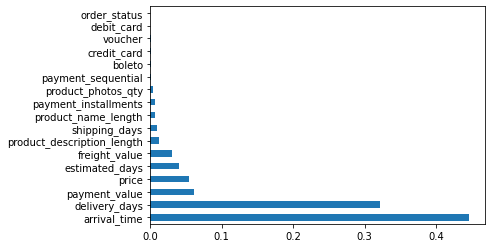

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Relatório da classificação utilizando florestas aleatórias

Já avaliamos a acurácia do modelo, agora vamos gerar um relatório de classificação. Viu alguma coisa estranha aí? Fica para a próxima aula...

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.78      0.24      0.37      3370
           1       0.87      0.99      0.92     17365

    accuracy                           0.87     20735
   macro avg       0.82      0.61      0.64     20735
weighted avg       0.85      0.87      0.83     20735

